In [1]:
#add auto reload for src function testing
%load_ext autoreload
%autoreload 2

#let's add the project directory to our module path
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
#also import all of our modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from src import data_cleaning
from src import cm_functions

#and here is our data directiory
data_folder = '../../data/'

In [2]:
sales = pd.read_csv(data_folder+'EXTR_RPSale_final.csv',dtype={'Major': 'string', 'Minor':'string', 'PIN': 'string'})
parcels = pd.read_csv(data_folder+'EXTR_Parcel_final.csv',dtype={'Major': 'string', 'Minor':'string', 'PIN': 'string'})
res_bldg = pd.read_csv(data_folder+'EXTR_ResBldg_final.csv', dtype={'Major':'string', 'Minor':'string', 'PIN':'string'})

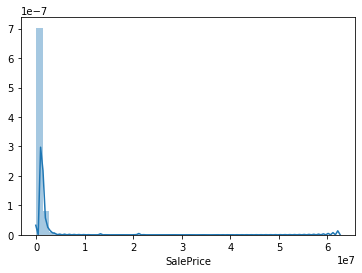

In [3]:
sns.distplot(sales.SalePrice)

Let's see if we can log transfrom the data so we get it a little more normal

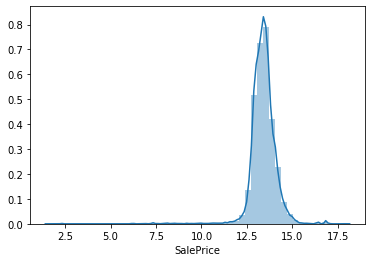

In [4]:
sns.distplot(np.log(sales.SalePrice))

In [5]:
sales['LogSalePrice'] = np.log(sales.SalePrice)

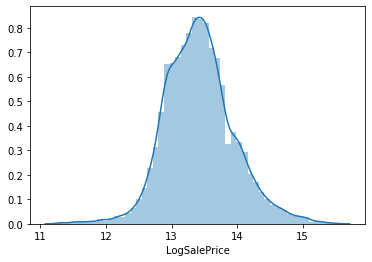

In [6]:
z = np.abs(stats.zscore(sales.LogSalePrice))
no_outliers = sales[z < 3]

sns.distplot(no_outliers.LogSalePrice)

Now I'll do the same with sq footage.

In [7]:
sqft = res_bldg.loc[:, ['PIN', 'SqFtTotLiving']]

In [8]:
price_vs_sqft_df = pd.merge(no_outliers, sqft, on='PIN', how='inner', suffixes=('_sales', '_res'))

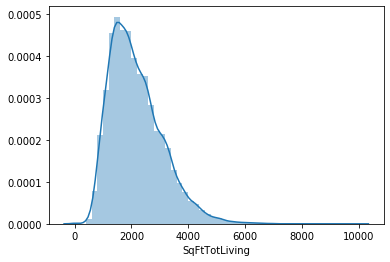

In [10]:
sns.distplot(price_vs_sqft_df.SqFtTotLiving)

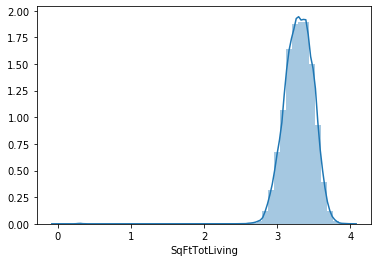

In [11]:
sns.distplot(np.log10(price_vs_sqft_df.SqFtTotLiving))

In [12]:
price_vs_sqft_df['LogSqFt'] = np.log10(price_vs_sqft_df.SqFtTotLiving)

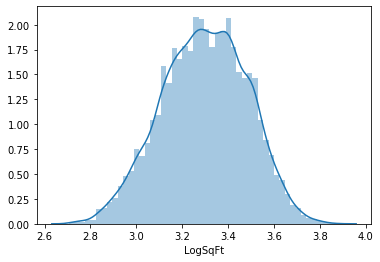

In [13]:
z = np.abs(stats.zscore(price_vs_sqft_df.LogSqFt))
no_outliers = price_vs_sqft_df[z < 3]

sns.distplot(no_outliers.LogSqFt)


# Testing

In [14]:
test_df_1 = no_outliers.loc[:,['LogSalePrice', 'LogSqFt', 'PIN']]
test_df_1

,LogSalePrice,LogSqFt,PIN
0,13.235692,3.285557,2130430120
1,12.983101,3.295567,9406520630
2,13.017003,3.033424,1402810020
3,12.170445,3.245513,1245500098
4,13.199324,3.093422,7973202320
...,...,...,...
28251,14.001990,3.459392,9290850760
28252,12.999065,3.155336,4059400095
28253,13.429848,3.356026,3816700025
28254,13.521139,3.352183,6150200505


In [15]:
fsm = cm_functions.get_fsm(test_df_1.loc[:,['LogSalePrice', 'LogSqFt']])

Rsquared: 0.33992458814911564
BETA values:
Intercept    7.986746
LogSqFt      1.649510
dtype: float64
------------------------------------
 
                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                 1.453e+04
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:03:14   Log-Likelihood:                -16016.
No. Observations:               28208   AIC:                         3.204e+04
Df Residuals:                   28206   BIC:                         3.205e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025   

Lagrange Multiplier p-value: nan
F-statistic p-value: 0.0


The null hypothesis is homoscedasticity, alternative hypothesis is heteroscedasticity.    Thus returning a low p-value means that the current model violates the homoscedasticity assumption


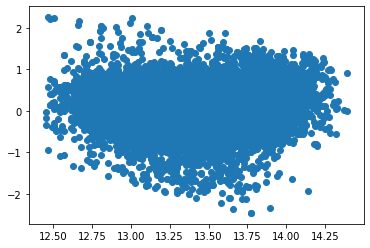

In [16]:
cm_functions.lr_homoscad(fsm, test_df_1.loc[:,['LogSalePrice', 'LogSqFt']])

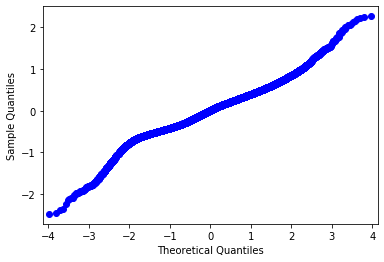

In [17]:
cm_functions.lr_normality(fsm)

In [18]:
cm_functions.lr_linear(fsm)

Rainbow statistic: 0.9601900199026179
Rainbow p-value: 0.9920685201075146


(0.9601900199026179, 0.9920685201075146)

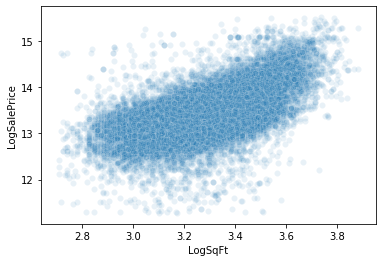

In [19]:
sns.scatterplot(test_df_1.LogSqFt, test_df_1.LogSalePrice, alpha=.1)

In [20]:
test_df_1.to_csv(data_folder+'fsm_data.csv')